[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yongtengchai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of positive sentiment remarks: 63
Number of negative sentiment remarks: 49
Number of neutral sentiment remarks: 141


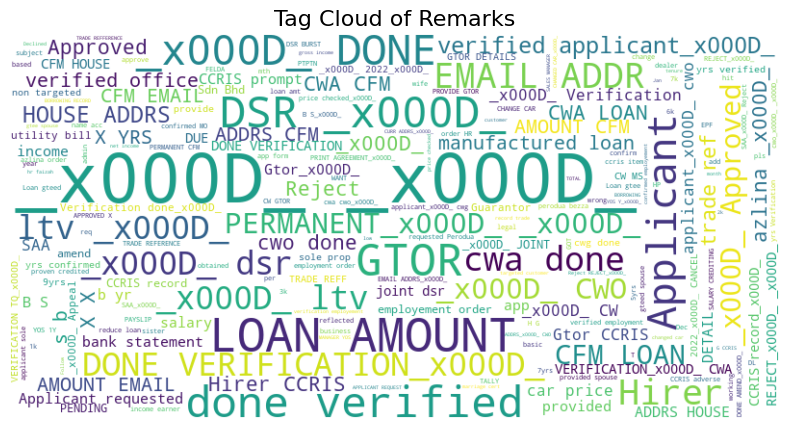

In [5]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
file_path = '/Users/yongtengchai/Downloads/Genie/1.xlsx'  # Path to the uploaded Excel file
df = pd.read_excel(file_path)

# Replace 'Remarks' with the actual column name containing text
text_column = 'Judge Remarks'

# Ensure the text column exists
if text_column not in df.columns:
    raise ValueError(f"Column '{text_column}' not found in the uploaded Excel file.")

# Ensure the text column is of type string and handle NaN values
df[text_column] = df[text_column].fillna('').astype(str)

# Define the function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment function to the text column and create a new Sentiment column
df['Sentiment'] = df[text_column].apply(get_sentiment)

# Convert the Sentiment column to numeric, coercing errors to NaN
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')

# Drop rows with NaN values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

# Count the number of positive, negative, and neutral sentiment remarks
num_positive_sentiments = len(df[df['Sentiment'] > 0])
num_negative_sentiments = len(df[df['Sentiment'] < 0])
num_neutral_sentiments = len(df[df['Sentiment'] == 0])

print("Number of positive sentiment remarks:", num_positive_sentiments)
print("Number of negative sentiment remarks:", num_negative_sentiments)
print("Number of neutral sentiment remarks:", num_neutral_sentiments)

# Concatenate all the text data into a single string
all_text = ' '.join(df[text_column])

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join([word for word in all_text.split() if word.lower() not in stop_words])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=0.9).generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Cloud of Remarks', fontsize=16)
plt.show()